In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Calculating average rewards over 10 plays
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    
    return reward
    
# Greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0 # default to zero
    meanReward = 0
    #print("This is a: ", a)
    for key in a.keys():
        expected_reward = np.mean(a[key])
        if (expected_reward > meanReward):
            bestArm = key
            meanReward = expected_reward
                    
    return bestArm

In [ ]:
# Tweak simulation parameters here
arms = np.random.rand(n) # probability of payouts for each arm

In [51]:
n = 10 # for an n-armed bandit problem
epsilon = 0.5 # How often should we pursue a non-greedy (exploratory) action?
nplays = int(1000) # Number of steps to play 
history = np.zeros((nplays, 2)) # To keep track of history of choices

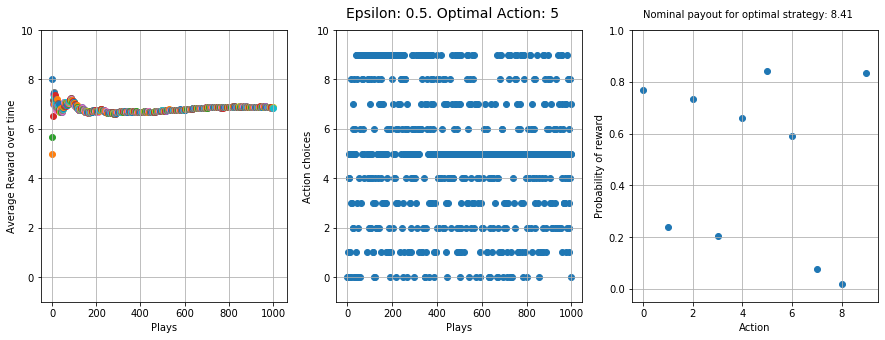

In [52]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
# Hash table to keep tab of actions and list of rewards
av = {}

for i in range(nplays):
    # Choosing the best action, exploit or explore
    if random.random() > epsilon: # Greedy selection
        choice = bestArm(av)
    else : # Random action
        choice = np.random.choice(range(10))

    # Reward obtained for said action
    current_reward = reward(arms[choice])
    
    # Updating memory for future calculations
    if not choice in av:
        av[choice] =  [current_reward]
    else:
        rewards = av[choice]
        rewards.append(current_reward)
        av[choice] = rewards

    history[i, :] = [choice, current_reward]

    runningMean = np.mean(history[:i+1, 1])
    plt.scatter(i, runningMean)

# print(av)

plt.xlabel("Plays")
plt.ylabel("Average Reward over time")
plt.ylim([-1, 10])
plt.grid()

plt.subplot(1, 3, 2)
plt.ylabel("Action choices")
plt.xlabel("Plays")
plt.ylim([-1, 10])
plt.scatter(range(len(history[:, 0])), history[:, 0])
plt.text(-6, 10.5, "Epsilon: "+str(epsilon) +". Optimal Action: "+str(np.where(arms == np.max(arms))[0][0]), size=14)
plt.grid()

plt.subplot(1,3,3)
plt.scatter(range(10), arms)
plt.xlabel('Action')
plt.ylabel('Probability of reward')
plt.ylim([-0.05, 1])
title_text = 'Nominal payout for optimal strategy: {0:4.2f}'.format(10.*np.max(arms))
plt.text(0, 1.05, title_text)
plt.grid()

In [46]:
print(arms, np.max(arms), np.where(arms == np.max(arms)))

[0.76664102 0.23951029 0.73209441 0.2045663  0.66130727 0.84065561
 0.59105018 0.07735917 0.01747982 0.83242497] 0.840655610295309 (array([5]),)


In [39]:
av[7]

KeyError: 7